In [1]:
import sys; sys.path.insert(0, '../..')

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(1234)

In [2]:
from src.deeplearning.ToyDataset import Data2d, Data1d
my_data = Data1d()

NB_WORKERS = 5

traindata_split = torch.utils.data.random_split(my_data, 
                                                [int(len(my_data) / NB_WORKERS) for _ in range(NB_WORKERS)])

# Creating a pytorch loader for a Deep Learning model
loaders = [torch.utils.data.DataLoader(traindata_split[i], batch_size=2, shuffle=True) for i in range(1)]

trainloader = DataLoader(dataset = traindata_split[1], batch_size = 4)# Training the model

In [3]:
# Defining a function for plotting the plane
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot2D(model,dataset,n=0):
      
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()
    
    x1 = dataset.x[:,0].view(-1,1).numpy()
    x2 = dataset.x[:,1].view(-1,1).numpy()
    y = dataset.y.numpy()
    X,Y = np.meshgrid(np.arange(x1.min(),x1.max(),0.05),np.arange(x2.min(), x2.max(), 0.05))
    
    yhat = w1*X + w2*Y + b
    
    # plotting
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    
    ax.plot(x1[:,0], x2[:,0], y[:,0], 'ro', label = 'y')
    ax.plot_surface(X,Y,yhat)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
    plt.title('Estimated plane iteration: '+ str(n))
    plt.show()

In [4]:
# Defining a function for plotting the plane
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot1D(model,dataset,n=0):
      
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    b = model.state_dict()['linear.bias'].numpy()
    
    x1 = dataset.x[:,0].view(-1,1).numpy()
    y = dataset.y.numpy()
    
    yhat = w1*x1 + b
    
    # plotting
    fig = plt.figure()
    
    plt.plot(x1[:,0],  y[:,0], 'ro', label = 'y')
    plt.plot(x1[:,0],  yhat[:,0])
    plt.title('Estimated line, iteration: '+ str(n))
    plt.show()

In [5]:
# Creating a linear regression model
from src.deeplearning.NeuralNetworksModel import LinReg
model = LinReg()
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-0.9102]])), ('linear.bias', tensor([-0.5984]))])


In [6]:
my_data.len

100

OrderedDict([('linear.weight', tensor([[-0.9102]])), ('linear.bias', tensor([-0.5984]))])
Before training:


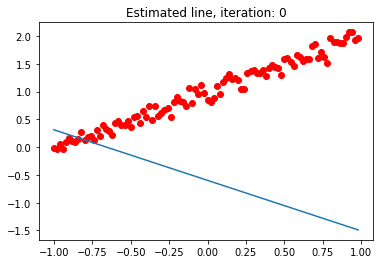

x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-1.1354]])
tensor([-1.7147])
--> loss : 2.222278118133545
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-1.8887]])
tensor([-2.9247])
--> loss : 4.15032958984375
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.8063]])
tensor([-3.2496])
--> loss : 3.271848440170288
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.6911]])
tensor([-1.7467])
--> loss : 2.0521602630615234
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7

x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-1.1238]])
tensor([-0.8400])
--> loss : 0.8313130140304565
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.4076]])
tensor([-1.0479])
--> loss : 0.46485862135887146
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.6735]])
tensor([-0.2421])
--> loss : 0.4444272518157959
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
        [1.7060]])
tensor([[-0.6010]])
tensor([-0.4310])
--> loss : 0.40600210428237915
x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0

y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.5587]])
tensor([-0.1285])
--> loss : 0.27682650089263916
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
        [1.7060]])
tensor([[-0.4868]])
tensor([-0.2502])
--> loss : 0.2343408465385437
x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.6779]])
tensor([0.1443])
--> loss : 0.22147974371910095
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.8624]])
tensor([-0.5498])
--> loss : 0.45876413583755493
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0

tensor([-0.1104])
--> loss : 0.0945143923163414
x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.4364]])
tensor([0.2250])
--> loss : 0.08651171624660492
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.5757]])
tensor([-0.3280])
--> loss : 0.1995270550251007
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.1774]])
tensor([-0.4429])
--> loss : 0.09564001113176346
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.3704]])
tensor([-0.0738])
--> loss : 0.12013155966997147
x = : tensor([[-0.2600

y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.3171]])
tensor([0.2401])
--> loss : 0.0478893518447876
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.4410]])
tensor([-0.2467])
--> loss : 0.11881186068058014
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.1234]])
tensor([-0.3384])
--> loss : 0.057456646114587784
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.2828]])
tensor([-0.0738])
--> loss : 0.0743982121348381
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
        [1

x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.1879]])
tensor([-0.0834])
--> loss : 0.03914555534720421
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
        [1.7060]])
tensor([[-0.1545]])
tensor([-0.0329])
--> loss : 0.01988581009209156
x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.1809]])
tensor([0.2456])
--> loss : 0.022957300767302513
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.2907]])
tensor([-0.1675])
--> loss : 0.05536411702632904
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
     

x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.0642]])
tensor([0.2440])
--> loss : 0.016965351998806
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.1636]])
tensor([-0.1068])
--> loss : 0.022231552749872208
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.0136]])
tensor([-0.1503])
--> loss : 0.018507983535528183
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.0942]])
tensor([-0.0991])
--> loss : 0.01723969727754593
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
      

y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.0399]])
tensor([0.2432])
--> loss : 0.017471974715590477
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.1373]])
tensor([-0.0947])
--> loss : 0.017642194405198097
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
        [0.7416]])
tensor([[-0.0033]])
tensor([-0.1337])
--> loss : 0.01723683997988701
x = : tensor([[-0.2000],
        [ 0.5200],
        [-0.9600],
        [-0.8000]])
y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.0760]])
tensor([-0.1026])
--> loss : 0.014372816309332848
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
      

y = : tensor([[0.8938],
        [1.5967],
        [0.0563],
        [0.1242]])
tensor([[-0.0555]])
tensor([-0.1066])
--> loss : 0.011669411323964596
x = : tensor([[-0.2600],
        [-0.7600],
        [-0.5600],
        [ 0.7400]])
y = : tensor([[0.7123],
        [0.2058],
        [0.4015],
        [1.7060]])
tensor([[-0.0404]])
tensor([-4.3757e-05])
--> loss : 0.0012428564950823784
x = : tensor([[-0.8400],
        [-0.2400],
        [ 0.7800],
        [-0.9400]])
y = : tensor([[ 0.1385],
        [ 0.5417],
        [ 1.5126],
        [-0.0282]])
tensor([[-0.0106]])
tensor([0.2421])
--> loss : 0.0188869908452034
x = : tensor([[-0.5400],
        [-1.0000],
        [ 0.6200],
        [ 0.6800]])
y = : tensor([[ 0.3888],
        [-0.0112],
        [ 1.5506],
        [ 1.8120]])
tensor([[-0.1057]])
tensor([-0.0802])
--> loss : 0.013124056160449982
x = : tensor([[ 0.7200],
        [-0.3200],
        [ 0.1200],
        [-0.3800]])
y = : tensor([[1.6121],
        [0.5621],
        [1.2523],
  

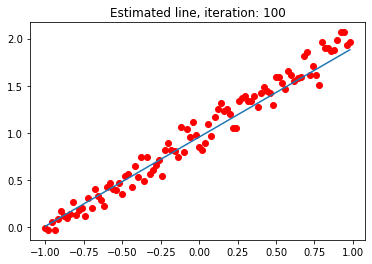

CPU times: user 1.28 s, sys: 99.2 ms, total: 1.38 s
Wall time: 1.26 s


In [7]:
%%time
# Parameters
torch.manual_seed(1234)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01) # Training data object which loads the artificial data
Loss = []  # variable for storing losses after each epoch
epochs = 100

print(model.state_dict())

print('Before training:')
plot1D(model, my_data)

def train_model(epochs):
    i = 0
    for epoch in range(epochs):
        for x,y in trainloader:
            print("x = :", x)
            print("y = :", y)
            yhat = model(x)
            loss = criterion(yhat,y)
            Loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            for param in model.parameters():
                print(param.grad)
            optimizer.step()# Calling the training function    
            i += 1
            print("--> loss :", Loss[-1])
    print(i)
train_model(epochs)

print("---> Final loss : ", Loss[-1])

print("After training: ")
plot1D(model, my_data, epochs)

In [8]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9446]])),
             ('linear.bias', tensor([0.9550]))])